# Importing Libraries

In [14]:
# Loading Libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances_argmin

# Loading the dataset

In [15]:
#Loading the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [16]:
#fetching the data
X = iris['data']
y = iris['target']

<center> Defining the input </center>

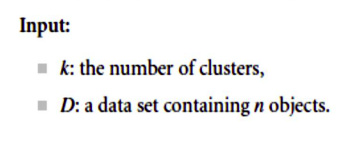

In [17]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Deciding number of clusters

In [18]:
#assigning the number of clusters
no_of_clusters = 3

In [19]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Plotting initial data points

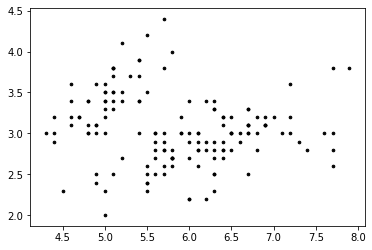

In [20]:
#plotting the initial data
plt.scatter(X[:, 0], X[:,1], s=7, color = 'black')

<center> Algorithm for k means </center>

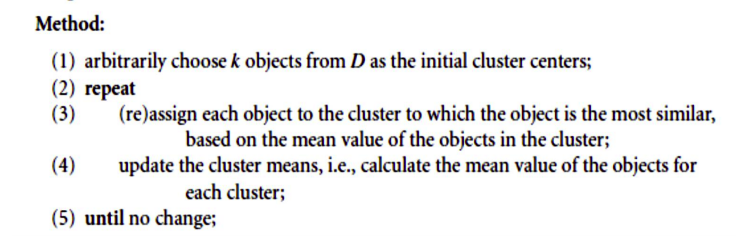

# Function to initialise and compute the clusters with data points

In [21]:
#function to find the clusters
def find_clusters(X, no_of_clusters, rseed=2):
    
    #assigning initial random values to cluster centers
    val = np.random.RandomState(rseed)
    i = val.permutation(X.shape[0])[:no_of_clusters]
    centers = X[i]
    
    
    while True:
       
        #getting minimum distance of all data points with their corresponding cluster centers and fetching the clusters
        centroid_label = pairwise_distances_argmin(X, centers)
        
        #finding new centers by taking the mean of all data present in the respective clusters
        new_centers = np.array([X[centroid_label == i].mean(0)
                                for i in range(no_of_clusters)])
        
        #defining condition for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, centroid_label


# Plotting the results

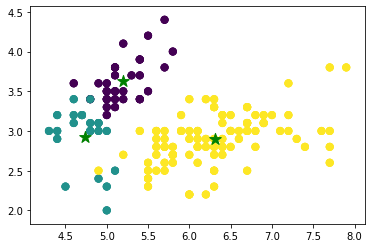

In [22]:
#Getting the cluster centers and the labels of clusters associated with all the data points
centers, labels = find_clusters(X, 3)
legends = ['cluster1','cluster2','cluster3']

#plotting the results
for i in range(3):
    plt.scatter(X[:, 0], X[:, 1], c=labels,label = legends[i],
            s=50, cmap='viridis');
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g',label = 'Centroids', s=150)
